In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import chi2_contingency
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

# 0. 데이터 확인

In [4]:
df_point = pd.read_excel('8기 학회원 트레인데이터 - 상점.xlsx')
df_re = pd.read_excel('8기 학회원 트레인데이터 - 재참여가능성.xlsx')
df_satisfy = pd.read_excel('8기 학회원 트레인데이터 - 학회만족도.xlsx')

In [5]:
df_point.head()

,상벌점 총점,"6-7) 본인이 현재 학업 외 데이터 분석 공부에 투입 가능한 하루 최대 시간은 몇 시간인가요? (2시간인 경우, 2로 적어주세요)",2-13) 현재 본인의 직업을 알려주세요.,2-7) 본인의 (최종) 전공 대학 구분을 선택해주세요. ( 복수선택 가능 ),3-1) 직업 내용을 작성해주세요.,7-1) 데이터 분석 제외 교육 받고 싶은 직무를 선택해 주세요.,"6-9) 희망 직무를 선택해주세요. (마케터, 개발자, 데이터 분석가 등)",6-10) 희망 직무에 데이터 역량이 필요한가요?,2-12) 졸업 후 진로를 선택해주세요.,6-11) BDA 학회에서 가장 얻고자 하는 1가지는 무엇인가요?,...,6-6) BDA 인스타그램을 팔로우 하셨나요?,2-11) 재학생의 경우 2024-1학기에 듣는 학점을 적어주세요. ( 예시 : 18학점 -> 18 ),6-5) BDA에서 진행되는 조별활동에 참여하실 의향이 있으신가요?,"6-7) 본인이 현재 학업 외 데이터 분석 공부에 투입 가능한 하루 최대 시간은 몇 시간인가요? (2시간인 경우, 2로 적어주세요).1","7-11) 데이터 관련 스터디, 동아리, 학회 참여 경험이 있으신가요?",8-1) 참여 경험이 있는 항목에 모두 선택해주세요.,"9-1) 데이터 활용 공모전, 프로젝트 참여 경험이 있으신가요?",11-1) 데이터 관련 직무 경험(인턴 등)이 있으신가요?,13-1) 구독중인 뉴스레터가 있나요?,14-2) 어떤 분야의 뉴스레터를 구독하고 있나요? (중복 가능)
0,-8.0,4~5,대학교 이수학기 4학기 이하,공학 (컴퓨터 공학 제외),NaN,개발,데이터 엔지니어,그렇다,취업,프로젝트 경험,...,아니요,NaN,네. 오프라인으로 참여하고 싶어요,4~5,없음,NaN,없음,없음,아니요,NaN
1,NaN,1,대학교 이수학기 4학기 이하,의약학,NaN,개발,인공지능 전문가,그렇다,대학원 진학,데이터 분석 역량,...,예,24,네. 온라인으로 참여하고 싶어요,1,없음,NaN,없음,없음,아니요,NaN
2,-77.0,2,대학교 이수학기 5학기 이상,IT (컴퓨터 공학 포함),NaN,AI,인공지능 전문가,그렇다,취업,프로젝트 경험,...,예,18,네. 오프라인으로 참여하고 싶어요,2,없음,NaN,없음,없음,아니요,NaN
3,-17.0,3,대학교 이수학기 4학기 이하,IT (컴퓨터 공학 포함),NaN,AI,데이터 분석가,매우 그렇다,취업,데이터 분석 역량,...,예,18,네. 오프라인으로 참여하고 싶어요,3,없음,NaN,있음,없음,아니요,NaN
4,NaN,2,대학교 이수학기 4학기 이하,IT (컴퓨터 공학 포함),NaN,AI,PM/서비스 기획자,그렇다,고민중,데이터 분석 역량,...,아니요,18,네. 온라인으로 참여하고 싶어요,2,없음,NaN,있음,없음,예,"트렌드/라이프, 경제/재테크"


In [6]:
df_re.head()

,7기 참여 여부,2-7) 본인의 (최종) 전공 대학 구분을 선택해주세요. ( 복수선택 가능 ),2-9) 본인의 (최종) 학과명을 적어주세요. ( 예시 : OO학과 ),2-10) 본인의 복수전공명을 적어주세요. ( 예시 : OO학과 ),2-12) 졸업 후 진로를 선택해주세요.,"6-9) 희망 직무를 선택해주세요. (마케터, 개발자, 데이터 분석가 등)",6-10) 희망 직무에 데이터 역량이 필요한가요?,"6-7) 본인이 현재 학업 외 데이터 분석 공부에 투입 가능한 하루 최대 시간은 몇 시간인가요? (2시간인 경우, 2로 적어주세요)",BDA를 친구/지인 등 주변에 얼마나 추천하고 싶으신가요?,"7-11) 데이터 관련 스터디, 동아리, 학회 참여 경험이 있으신가요?",8-1) 참여 경험이 있는 항목에 모두 선택해주세요.,"9-1) 데이터 활용 공모전, 프로젝트 참여 경험이 있으신가요?",11-1) 데이터 관련 직무 경험(인턴 등)이 있으신가요?,13-1) 구독중인 뉴스레터가 있나요?,14-2) 어떤 분야의 뉴스레터를 구독하고 있나요? (중복 가능)
0,0,공학 (컴퓨터 공학 제외),신소재공학과,NaN,취업,데이터 엔지니어,그렇다,4~5,NaN,없음,NaN,없음,없음,아니요,NaN
1,0,의약학,의예과,NaN,대학원 진학,인공지능 전문가,그렇다,1,NaN,없음,NaN,없음,없음,아니요,NaN
2,0,IT (컴퓨터 공학 포함),IT공학고ㅓ,빅데이터학과,취업,인공지능 전문가,그렇다,2,NaN,없음,NaN,없음,없음,아니요,NaN
3,0,IT (컴퓨터 공학 포함),컴퓨터 공학과,NaN,취업,데이터 분석가,매우 그렇다,3,NaN,없음,NaN,있음,없음,아니요,NaN
4,0,IT (컴퓨터 공학 포함),인공지능학과,NaN,고민중,PM/서비스 기획자,그렇다,2,NaN,없음,NaN,있음,없음,예,"트렌드/라이프, 경제/재테크"


In [7]:
df_satisfy.head()

,1-1) BDA 학회에 참여하신 적이 있으십니까?,1-2) 이전에 참여했던 기수와 분반을 모두 선택해주세요. (복수선택 가능) [3기],1-2) 이전에 참여했던 기수와 분반을 모두 선택해주세요. (복수선택 가능) [4기],1-2) 이전에 참여했던 기수와 분반을 모두 선택해주세요. (복수선택 가능) [5기],1-2) 이전에 참여했던 기수와 분반을 모두 선택해주세요. (복수선택 가능) [6기],1-2) 이전에 참여했던 기수와 분반을 모두 선택해주세요. (복수선택 가능) [7기],1-4) 8기에 참여를 원하는 분반 번호를 선택해주세요.,1-4) 8기에 참여를 원하는 첫 번째 분반 번호를 선택해주세요.,1-5) 8기에 참여를 원하는 두 번째 분반 번호를 선택해주세요.,2-7) 본인의 (최종) 전공 대학 구분을 선택해주세요. ( 복수선택 가능 ),...,2-12) 졸업 후 진로를 선택해주세요.,2-13) 현재 본인의 직업을 알려주세요.,3-1) 직업 내용을 작성해주세요.,유입 경로를 알려주세요.,5-2) 추천인의 참여 기수와 분반을 적어주세요,"6-9) 희망 직무를 선택해주세요. (마케터, 개발자, 데이터 분석가 등)",6-10) 희망 직무에 데이터 역량이 필요한가요?,6-11) BDA 학회에서 가장 얻고자 하는 1가지는 무엇인가요?,"6-7) 본인이 현재 학업 외 데이터 분석 공부에 투입 가능한 하루 최대 시간은 몇 시간인가요? (2시간인 경우, 2로 적어주세요)",BDA를 친구/지인 등 주변에 얼마나 추천하고 싶으신가요?
0,아니요,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,공학 (컴퓨터 공학 제외),...,취업,대학교 이수학기 4학기 이하,NaN,에브리타임,NaN,데이터 엔지니어,그렇다,프로젝트 경험,4~5,NaN
1,아니요,NaN,NaN,NaN,NaN,NaN,NaN,9.0,1.0,의약학,...,대학원 진학,대학교 이수학기 4학기 이하,NaN,에브리타임,NaN,인공지능 전문가,그렇다,데이터 분석 역량,1,NaN
2,아니요,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,IT (컴퓨터 공학 포함),...,취업,대학교 이수학기 5학기 이상,NaN,에브리타임,NaN,인공지능 전문가,그렇다,프로젝트 경험,2,NaN
3,아니요,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,IT (컴퓨터 공학 포함),...,취업,대학교 이수학기 4학기 이하,NaN,에브리타임,NaN,데이터 분석가,매우 그렇다,데이터 분석 역량,3,NaN
4,아니요,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,IT (컴퓨터 공학 포함),...,고민중,대학교 이수학기 4학기 이하,NaN,에브리타임,NaN,PM/서비스 기획자,그렇다,데이터 분석 역량,2,NaN


## 우선적으로 데이터 컬럼명 변경 필요

In [8]:
print(df_point.columns, df_re.columns, df_satisfy.columns)

Index(['상벌점 총점',
       '6-7) 본인이 현재 학업 외 데이터 분석 공부에 투입 가능한 하루 최대 시간은 몇 시간인가요? (2시간인 경우, 2로 적어주세요)',
       '2-13) 현재 본인의 직업을 알려주세요.',
       '2-7) 본인의 (최종) 전공 대학 구분을 선택해주세요. ( 복수선택 가능 )', '3-1) 직업 내용을 작성해주세요.',
       '7-1) 데이터 분석 제외 교육 받고 싶은 직무를 선택해 주세요.',
       '6-9) 희망 직무를 선택해주세요. (마케터, 개발자, 데이터 분석가 등)',
       '6-10) 희망 직무에 데이터 역량이 필요한가요?', '2-12) 졸업 후 진로를 선택해주세요.',
       '6-11) BDA 학회에서 가장 얻고자 하는 1가지는 무엇인가요?', '유입 경로를 알려주세요.',
       '6-6) BDA 인스타그램을 팔로우 하셨나요?',
       '2-11) 재학생의 경우 2024-1학기에 듣는 학점을 적어주세요. ( 예시 : 18학점 -> 18 )',
       '6-5) BDA에서 진행되는 조별활동에 참여하실 의향이 있으신가요?',
       '6-7) 본인이 현재 학업 외 데이터 분석 공부에 투입 가능한 하루 최대 시간은 몇 시간인가요? (2시간인 경우, 2로 적어주세요).1',
       '7-11) 데이터 관련 스터디, 동아리, 학회 참여 경험이 있으신가요?',
       '8-1) 참여 경험이 있는 항목에 모두 선택해주세요.', '9-1) 데이터 활용 공모전, 프로젝트 참여 경험이 있으신가요?',
       '  11-1) 데이터 관련 직무 경험(인턴 등)이 있으신가요?  ', '13-1) 구독중인 뉴스레터가 있나요?  ',
       '14-2) 어떤 분야의 뉴스레터를 구독하고 있나요? (중복 가능)  '],
      dtype='object') Index(['7기 참여 여부', '2-7) 본인의 (최종) 전공 대학 구분을 선택해주

In [9]:
df_point.columns = ['상벌점', '하루공부시간', '직업', '최종학력', '직업내용', '교육희망직무', '희망직무','데이터역량필요', '졸업후진로', 'bda하는이유', '유입경로', '팔로우여부','학점','조별활동참여희망', '하루공부시간_2', '스터디경험', '참여경험', '프로젝트경험', '직무경험', '뉴스레터구독여부','뉴스레터구독이름']
df_re.columns = ['7기참여여부', '최종학력', '최종학과',  '복수전공','졸업후진로', '희망직무', '데이터역량필요','하루공부시간', 'bda추천정도', ' 스터디경험', '참여경험', '프로젝트경험', '직무경험', '뉴스레터구독여부','뉴스레터구독이름']
df_satisfy.columns = ['이전참여여부','3기분반','4기분반','5기분반','6기분반','7기분반','8기분반번호_1','8기분반번호_2_','8기분반번호_3', '최종학력','최종학과', '복수전공', '졸업후진로', '직업', '직업내용', '유입경로', '추천인정보','희망직무','데이터역량필요','bda하는이유','하루공부시간','bda추천정도']

개인의 특성과 만족도에 해당하는 변수 구분 
----------------------------------------------
1. 개인의 특성: 
> [하루공부시간, 직업, 최종학력, 교육희망직무, 희망직무, bda하는이유, 유입경로, 학점, 스터디경험, 참여경험, 프로젝트경험, 직무경험, 뉴스레터구독여부, 팔로우여부, 조별활동참여희망]
2. 만족도 특성:
> [상벌점, 7기 참여여부, 이전 참여여부]

In [10]:
df_point.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   상벌점       954 non-null    float64
 1   하루공부시간    1235 non-null   object 
 2   직업        1235 non-null   object 
 3   최종학력      1235 non-null   object 
 4   직업내용      16 non-null     object 
 5   교육희망직무    1235 non-null   object 
 6   희망직무      1235 non-null   object 
 7   데이터역량필요   1235 non-null   object 
 8   졸업후진로     1235 non-null   object 
 9   bda하는이유   1235 non-null   object 
 10  유입경로      1235 non-null   object 
 11  팔로우여부     1235 non-null   object 
 12  학점        1188 non-null   object 
 13  조별활동참여희망  1235 non-null   object 
 14  하루공부시간_2  1235 non-null   object 
 15  스터디경험     1235 non-null   object 
 16  참여경험      243 non-null    object 
 17  프로젝트경험    1235 non-null   object 
 18  직무경험      1235 non-null   object 
 19  뉴스레터구독여부  1235 non-null   object 
 20  뉴스레터구독이름  307 non-null    obje

In [11]:
df_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   7기참여여부    1234 non-null   int64  
 1   최종학력      1234 non-null   object 
 2   최종학과      1234 non-null   object 
 3   복수전공      569 non-null    object 
 4   졸업후진로     1234 non-null   object 
 5   희망직무      1234 non-null   object 
 6   데이터역량필요   1234 non-null   object 
 7   하루공부시간    1234 non-null   object 
 8   bda추천정도   167 non-null    float64
 9    스터디경험    1234 non-null   object 
 10  참여경험      243 non-null    object 
 11  프로젝트경험    1234 non-null   object 
 12  직무경험      1234 non-null   object 
 13  뉴스레터구독여부  1234 non-null   object 
 14  뉴스레터구독이름  308 non-null    object 
dtypes: float64(1), int64(1), object(13)
memory usage: 144.7+ KB


In [12]:
df_satisfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   이전참여여부     1238 non-null   object 
 1   3기분반       200 non-null    object 
 2   4기분반       200 non-null    object 
 3   5기분반       200 non-null    object 
 4   6기분반       200 non-null    object 
 5   7기분반       200 non-null    object 
 6   8기분반번호_1   1102 non-null   float64
 7   8기분반번호_2_  137 non-null    float64
 8   8기분반번호_3   139 non-null    float64
 9   최종학력       1238 non-null   object 
 10  최종학과       1238 non-null   object 
 11  복수전공       571 non-null    object 
 12  졸업후진로      1238 non-null   object 
 13  직업         1238 non-null   object 
 14  직업내용       16 non-null     object 
 15  유입경로       1238 non-null   object 
 16  추천인정보      40 non-null     object 
 17  희망직무       1238 non-null   object 
 18  데이터역량필요    1238 non-null   object 
 19  bda하는이유    1238 non-null   object 
 20  하루공부시간  

- 대부분 object type으로 구성되어 있음. 바꿀 필요 있음

# 1. 개인 특성 파악

## 1-1. 하루공부 시간 전처리
- df_point에서는 하루공부시간이 2개라서 하나 드랍
- 나머지는 object 타입으로 되어있기 때문에 float로 바꿔줄 필요 있음
- 값들을 전반적으로 맞출 필요 있음

In [13]:
# 하루공부 시간
df_point = df_point.drop(columns=['하루공부시간_2'])

In [14]:
study_time = df_point['하루공부시간'].value_counts().to_dict()
study_time

{2: 563,
 3: 176,
 1: 162,
 4: 69,
 5: 31,
 1.5: 29,
 '2시간': 23,
 '3시간': 16,
 '1시간': 12,
 '2~3': 11,
 '1~2': 11,
 datetime.datetime(2024, 1, 2, 0, 0): 11,
 6: 8,
 datetime.datetime(2024, 2, 3, 0, 0): 7,
 '2-3시간': 7,
 0: 7,
 8: 6,
 '5시간': 6,
 '4시간': 5,
 '1시간 반': 4,
 0.5: 4,
 '3~4': 4,
 '1.5~2': 3,
 '1~2시간': 3,
 '6시간': 3,
 10: 2,
 '하루 1시간': 2,
 '2,3': 2,
 '1-2시간': 2,
 datetime.datetime(2024, 3, 4, 0, 0): 2,
 '5~6': 2,
 'Adsp하루 2시간정도 공부중': 1,
 '일주일 4시간 가능합니다.': 1,
 '1~3시간': 1,
 '1-3시간 사이': 1,
 '개강 이후에는 1시간': 1,
 '하루 2시간': 1,
 '4~5': 1,
 2.5: 1,
 '평일에는 2시간 주말에는 4시간씩 가능합니다': 1,
 '럾음': 1,
 '방학 동안은 하지 않음': 1,
 '개강 후 2': 1,
 '8시간': 1,
 '1시간 내외': 1,
 '2시간 이상': 1,
 '무한': 1,
 '학기 중에는 1~2': 1,
 '12시간': 1,
 'ㅣ2': 1,
 '하루 종일': 1,
 '30분 ~ 1시간': 1,
 '6~7': 1,
 '하루 1-2시간': 1,
 datetime.datetime(2024, 4, 6, 0, 0): 1,
 '평일 2, 주말 6': 1,
 '1~4': 1,
 '하루 1시간~1시간 30분': 1,
 '휴학 중이어서 최대한 투자 가능합니다. 4시간 투자 가능할 것 같습니다.': 1,
 '없음': 1,
 '개강 전이라 다른 공부 하고 있음': 1,
 '3♧': 1,
 '방학에는 4~5시간 이상, 학기중에는 1시간 반 정도': 1,
 '1–2시간

In [15]:
# 처음에 나온 숫자를 가져오는 정규식 활용해서 처음에 나오는 숫자 가져오기, 글자로만 이루어진 경우는 그냥 없음 처리
# 13시간을 넘는 경우도 없음 처리
df_point['하루공부시간'] = df_point['하루공부시간'].apply(lambda x: str(x)).apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0).apply(lambda x: x if x<13 else 0)
df_re['하루공부시간'] = df_re['하루공부시간'].apply(lambda x: str(x)).apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0).apply(lambda x: x if x<13 else 0)
df_satisfy['하루공부시간'] = df_satisfy['하루공부시간'].apply(lambda x: str(x)).apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0).apply(lambda x: x if x<13 else 0)


In [16]:
df_point['하루공부시간'].value_counts(), df_re['하루공부시간'].value_counts(), df_satisfy['하루공부시간'].value_counts()

(하루공부시간
 2     615
 1     238
 3     198
 4      78
 0      43
 5      40
 6      12
 8       8
 10      2
 12      1
 7       1
 Name: count, dtype: int64,
 하루공부시간
 2     623
 1     249
 3     200
 4      77
 5      40
 0      21
 6      12
 8       8
 10      2
 12      1
 7       1
 Name: count, dtype: int64,
 하루공부시간
 2     624
 1     249
 3     201
 4      79
 5      40
 0      21
 6      12
 8       8
 10      2
 12      1
 7       1
 Name: count, dtype: int64)

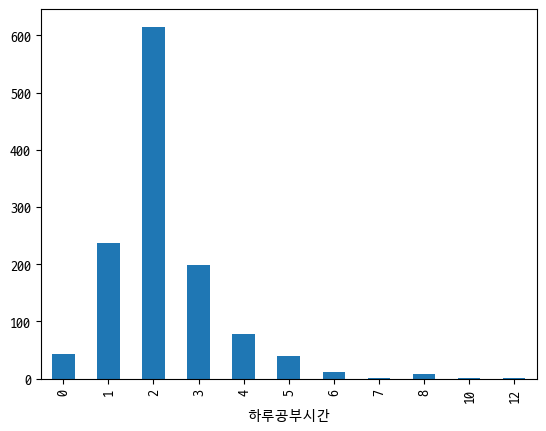

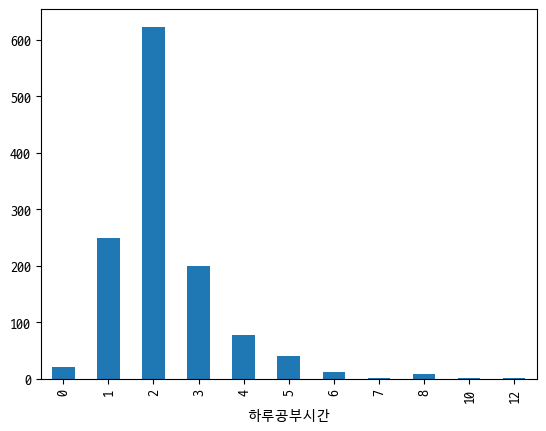

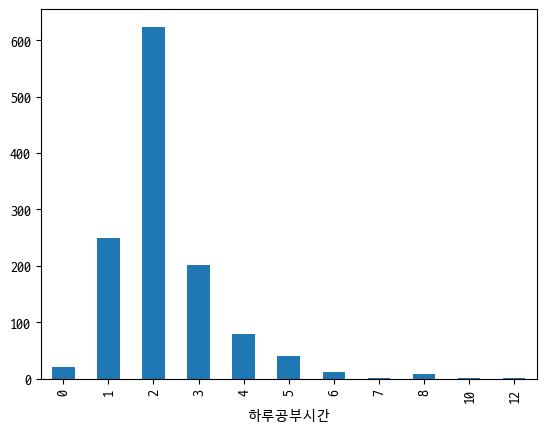

In [17]:
df_point['하루공부시간'].value_counts().sort_index().plot(kind='bar')
plt.show()
df_re['하루공부시간'].value_counts().sort_index().plot(kind='bar')
plt.show()
df_satisfy['하루공부시간'].value_counts().sort_index().plot(kind='bar')
plt.show()

## 1-2. 직업

- 직업은 df_point와 df_satisfy에만 있음 

- 2학년 이하와 2학년 이상으로만 구별하기로 함 그 외는 수가 적고 그보다가 나이가 많은 항목이 많으니 2학년 이상으로 포함

In [18]:
df_point['직업'].value_counts(), df_satisfy['직업'].value_counts()

(직업
 대학교 이수학기 5학기 이상          708
 대학교 이수학기 4학기 이하          441
 졸업생                       42
 직장인                       16
 대학원생                      14
 졸업유예                       3
 졸업유예생                      2
 수료생                        1
 대학교 이수학기 4학기 이하 및 직장인      1
 대학교 신입생                    1
 발령 대기 중                    1
 군휴학                        1
 직장인+야간대                    1
 취준생                        1
 사회복무요원                     1
 사회복무요원(공익)                 1
 Name: count, dtype: int64,
 직업
 대학교 이수학기 5학기 이상          710
 대학교 이수학기 4학기 이하          442
 졸업생                       42
 직장인                       16
 대학원생                      14
 졸업유예                       3
 졸업유예생                      2
 수료생                        1
 대학교 이수학기 4학기 이하 및 직장인      1
 대학교 신입생                    1
 발령 대기 중                    1
 군휴학                        1
 직장인+야간대                    1
 취준생                        1
 사회복무요원                     1
 사회복무요원(공익)                 1
 Nam

In [19]:
df_point['직업'] = df_point['직업'].apply(lambda x: '대학교 2학년 이하' if x == '대학교 이수학기 4학기 이하' else '대학교 3학년 이상')
df_satisfy['직업'] = df_satisfy['직업'].apply(lambda x: '대학교 2학년 이하' if x == '대학교 이수학기 4학기 이하' else '대학교 3학년 이상')

In [20]:
df_point['직업'].value_counts(), df_satisfy['직업'].value_counts()

(직업
 대학교 3학년 이상    795
 대학교 2학년 이하    441
 Name: count, dtype: int64,
 직업
 대학교 3학년 이상    796
 대학교 2학년 이하    442
 Name: count, dtype: int64)

<Axes: xlabel='직업'>

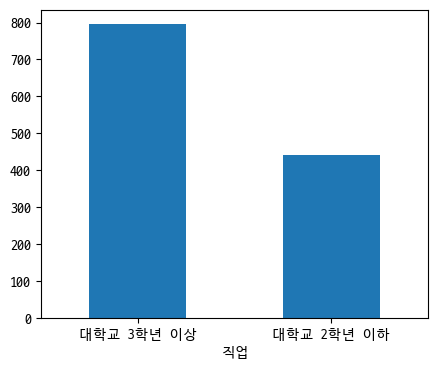

In [21]:
plt.figure(figsize=(5,4))
df_point['직업'].value_counts().plot(kind='bar',rot=0)


## 1-3. 최종학력 전처리

- 최종학력은 학과로 구별 컴퓨터를 공부하는 IT 그에 준하는 공학 그리고 조금 거리 있는 이과로 구별
- 수학을 공부하는 상경계열로 구별 그리고 그 외는 문과로 구별

In [22]:
df_point.loc[df_point['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('IT'), '최종학력'] = 'IT'
df_point.loc[df_point['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('공학'), '최종학력'] = '공학'
df_point.loc[df_point['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('경영학'), '최종학력'] = '상경'
df_point.loc[df_point['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('경제'), '최종학력'] = '상경'
df_point.loc[df_point['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('사회과학'), '최종학력'] = '문과'
df_point.loc[df_point['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('자연과학'), '최종학력'] = '이과'
df_point.loc[df_point['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('인문학'), '최종학력'] = '문과'
df_point.loc[df_point['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('교육학'), '최종학력'] = '문과'
df_point.loc[df_point['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('법학'), '최종학력'] = '문과'

In [23]:
df_re.loc[df_re['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('IT'), '최종학력'] = 'IT'
df_re.loc[df_re['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('공학'), '최종학력'] = '공학'
df_re.loc[df_re['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('경영학'), '최종학력'] = '상경'
df_re.loc[df_re['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('경제'), '최종학력'] = '상경'
df_re.loc[df_re['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('사회과학'), '최종학력'] = '문과'
df_re.loc[df_re['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('자연과학'), '최종학력'] = '이과'
df_re.loc[df_re['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('인문학'), '최종학력'] = '문과'
df_re.loc[df_re['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('교육학'), '최종학력'] = '문과'
df_re.loc[df_re['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('법학'), '최종학력'] = '문과'

In [24]:
df_satisfy.loc[df_satisfy['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('IT'), '최종학력'] = 'IT'
df_satisfy.loc[df_satisfy['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('공학'), '최종학력'] = '공학'
df_satisfy.loc[df_satisfy['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('경영학'), '최종학력'] = '상경'
df_satisfy.loc[df_satisfy['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('경제'), '최종학력'] = '상경'
df_satisfy.loc[df_satisfy['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('사회과학'), '최종학력'] = '문과'
df_satisfy.loc[df_satisfy['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('자연과학'), '최종학력'] = '이과'
df_satisfy.loc[df_satisfy['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('인문학'), '최종학력'] = '문과'
df_satisfy.loc[df_satisfy['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('교육학'), '최종학력'] = '문과'
df_satisfy.loc[df_satisfy['최종학력'].apply(lambda x:str(x) if type(x) == str else '모름').str.startswith('법학'), '최종학력'] = '문과'

<Axes: ylabel='count'>

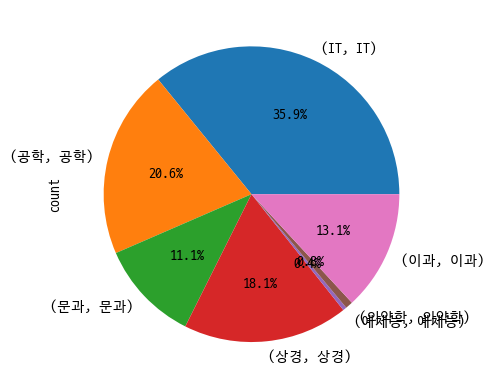

In [25]:
df_point['최종학력'].groupby(df_point['최종학력']).value_counts().plot(kind='pie',autopct='%1.1f%%')

## 1.4 교육희망직무 전처리

-df_point에만 있는 값이므로 확인만 함

In [26]:
df_point['교육희망직무'].value_counts()

교육희망직무
AI                             306
기획, 전략                         180
금융, 보험                         159
개발                             156
마케팅, 광고, MD                    142
경영, 회계, 세무                     102
바이오                             48
제조, 생산                          40
물류, 무역                          33
인사, HR                          28
법무, 사무, 총무                       5
영업                               3
없음                               2
반도체                              2
.                                2
-                                2
개발, 보안                           1
공정기술,공정설계                        1
디자인                              1
공공기관                             1
자동차, 반도체                         1
품질/관리                            1
개발과 AI, 금융, 디지털기획                1
정보보안                             1
이커머스 산업 관련                       1
모르겠음                             1
개발, AI                           1
도시 개발                            1
보건, 의료       

<Figure size 300x200 with 0 Axes>

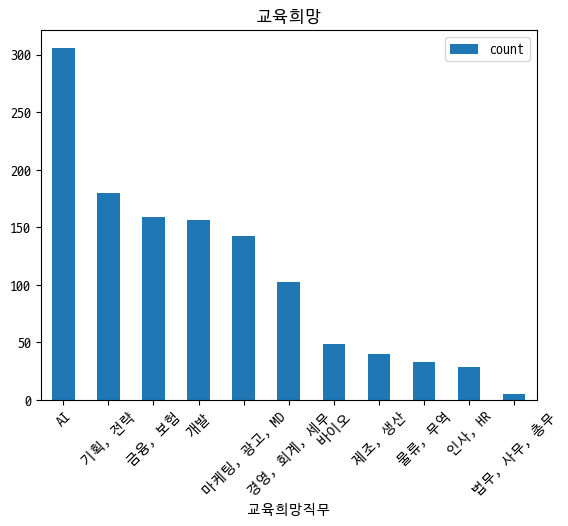

In [27]:
plt.figure(figsize=(3,2))
hope_job = pd.DataFrame(df_point['교육희망직무'].value_counts())
hope_job = hope_job[hope_job['count']>= 5]
hope_job.plot(kind='bar',rot=45, title='교육희망')
plt.show()

## 1-5. 희망직무 전처리

In [28]:
df_point['희망직무'].value_counts().to_dict()

{'데이터 분석가': 456,
 '데이터 사이언티스트': 236,
 '인공지능 전문가': 84,
 '마케터': 80,
 '데이터 엔지니어': 65,
 '소프트웨어 개발자': 65,
 '자연과학계열 연구자': 54,
 'PM/서비스 기획자': 44,
 '미정': 11,
 'MD': 11,
 'UX/UI 디자이너': 11,
 '회계사': 4,
 '컨설턴트': 3,
 '사회과학계열 연구자': 3,
 '퍼포먼스 마케터': 3,
 'SCM': 2,
 '대학원': 2,
 'HR': 2,
 '인공지능 전문가를 목표로 하나 현재 ux 쪽 경험 존재함': 1,
 'NLP': 1,
 '공정 엔지니어, Cs엔지니어': 1,
 '머신러닝을 도입한 품질관리 업계에서의 종사': 1,
 '미정(모르겠음)': 1,
 '보험계리사': 1,
 '고민': 1,
 '품질데이터분석': 1,
 '인사직무': 1,
 '교통관련 직무': 1,
 '데이터 분석쪽을 희망하지만 아직 직무를 정확하게 정하지 못했습니다': 1,
 '데이터분석가, PM': 1,
 '심리학 대학원': 1,
 '아직 못 정함': 1,
 '모르겠다': 1,
 '설비': 1,
 '편성': 1,
 '반도체 직무': 1,
 '공정엔지니어': 1,
 '회계사 준비': 1,
 '아직 조금 더 알아봐야 할 것 같습니다': 1,
 '트랙터엔지니어': 1,
 '아직 고민중입니다': 1,
 '스포츠 전력분석원': 1,
 '데이터분석가 or PM': 1,
 '반도체 공정 엔지니어': 1,
 '채권평가사': 1,
 '데이터 분석가, 데이터 사이언티스트': 1,
 '공정 엔지니어': 1,
 '자동차,반도체계열 엔지니어': 1,
 '영업관리': 1,
 '데이터 분석가, 인공지능 전문가, 소프트웨어 개발자, UX/UI 디자이너, PM/서비스 기획자 다 하고싶음..': 1,
 '자동차시험평가': 1,
 '아직 잘 모르겠습니다.': 1,
 '기상 연구원': 1,
 '아직 잘 모르겠다.': 1,
 '금융 공학 데이터 분석가': 1,
 '반도체 산업에서 필요한 데이

In [29]:
job_class =  {
    '데이터 엔지니어' : 'DE',
    '인공지능 전문가' : 'AI',
    '데이터 분석가' : 'DA',
    '자연과학계열 연구자, 데이터 분석가' : '연구',
    '데이터 사이언티스트' : 'DS',
    '아직은 직무에 관해서 확실하게 정하지않아서 학회수업과 전공들으면서 생각해볼 예정입니다.' : '미정',
    '아직 미정': '미정', 
    '소프트웨어 개발자' : '개발',
    '자연과학계열 연구자' : '연구',
    '경영컨설턴트' : '경영',
    '마케터': '마케팅',
    '퀀트 리서처/에널리스트' : '금융',
    '잘 모르겠다' :'미정',
    '해외영업' : '영업',
    'PM/서비스 기획자' : '기획', 
    '사회과학계열 연구자' : '연구',
    'DB관리자' : 'DB',
    '영업' : '영업',
    'SCM' : '생산',
    '파이낸셜 애널리틱스' : '금융',
    '컨설팅' : '경영',
    '확실하지 않아요' : '미정',
    'UX/UI 디자이너' : '디자인',
    '아직 정하지 못함' : '미정', 
    '문화유산연구원' : '기타',
    '경영 데이터' : '경영',
    '전산직' : '기타',
    '반도체 엔지니어' : '엔지니어',
    '금융계열 취업' : '금융',
    'MD' : '기획',
    '공정기술 엔지니어' : '엔지니어',
    '고민중':'미정',
    '레이더와 관련된 데이터 분석가' : 'DA',
    '반도체공정엔지니어' : '엔지니어',
    '아직 확고하게 결정한 건 없지만 은행에서 일하고 싶습니다. ' : '금융',
    '퍼포먼스 마케터' : '마케팅',
    '퀀트' : '금융',
    '기계공학 엔지니어' :'엔지니어', 
    '금융공기업 A매치 전산직렬' : '금융',
    '아직 고민 중이니다' : '미정',
    '삼성전자 평가및분석 엔지니어 (PE팀)' : '엔지니어',
     '.' : '미정', 
     'hr' : '인사',
     '아직 잘 모르겠다. DE, DA에 가까운 것 같으나, 현업에서 어느정도의 차이가 있는지 모르겠음.' : '미정',
     '공학계열 연구자' : '연구자',
     '회계사' : '경영', 
     '대학교 입학사정관' : '교육', 
     '오퍼레이션 분야 ' : '생산', 
     '품질관리': '생산', 
     '화학공학 엔지니어' : '엔지니어',
     '로봇 엔지니어' : '엔지니어', 
     '아직 모름' : '미정', 
     '경영 컨설턴트' : '경영', 
     '찾는 과정입니다.' : '미정', 
     '환경안전관리 또는 설계' : '엔지니어',
     'HR' : '인사',
     '펀드매니저' : '금융',
      'scm 담당자' : '생산',
       '금융공학 관련' : '금융', 
       '웹디자인' : '디자인',
       '머신러닝을 도입한 품질관리 업계에서의 종사' : '생산', 
       '고민' : '미정',
        '심리학 대학원' : '연구',
       '데이터 분석쪽을 희망하지만 아직 직무를 정확하게 정하지 못했습니다' : '미정',
        '교통관련 직무' : '기타',
         '회계사 준비' : '경영',
       '공정엔지니어' : '엔지니어',
        '편성' : '기타',
         '설비' : '엔지니어', 
         '모르겠다' : '미정', 
         '아직 못 정함' : '미정',
          '데이터분석가, PM' : 'DA',
       '아직 조금 더 알아봐야 할 것 같습니다' : '미정',
       '인공지능 전문가를 목표로 하나 현재 ux 쪽 경험 존재함' : 'AI', 
       '인사직무' :'인사',
       '품질데이터분석' : 'DA',
        '보험계리사' :'금융',
        '미정(모르겠음)' : '미정',
        '컨설턴트' : '경영',
         'NLP' : 'DS',
         '반도체 직무' : '엔지니어',
       '아직 고민중입니다' : '미정', 
       '스포츠 전력분석원' : '기타', 
       '아직 확실하지 않습니다' : '미정', 
       '보안관련' : '개발',
        '사회과학언구자' : '연구',
       '금융권 디지털 직무' : '금융',
       'Business analyst' : 'DA',
       '반도체 산업에서 필요한 데이터 분석을 할 수 있는 엔지니어' : '엔지니어',
       '금융 공학 데이터 분석가' : '금융', 
       '아직 잘 모르겠다.': '미정',
       '기상 연구원' : '기타', 
       '아직 잘 모르겠습니다.': '미정',
       '데이터 분석가, 인공지능 전문가, 소프트웨어 개발자, UX/UI 디자이너, PM/서비스 기획자 다 하고싶음..' : '미정',
       '자동차,반도체계열 엔지니어' : '엔지니어',
       '공정 엔지니어' : '엔지니어',
       '데이터 분석가, 데이터 사이언티스트' : 'DA',
       '채권평가사': '금융',
       '반도체 공정 엔지니어' : '엔지니어',
        '데이터저널리스트' : '기타',
        '아직 고민중' : '미정',
        'DB' : 'DA',
        np.nan: np.nan
}

In [30]:
df_point['희망직무']

0         데이터 엔지니어
1         인공지능 전문가
2         인공지능 전문가
3          데이터 분석가
4       PM/서비스 기획자
           ...    
1231      데이터저널리스트
1232    데이터 사이언티스트
1233           마케터
1234      인공지능 전문가
1235           NaN
Name: 희망직무, Length: 1236, dtype: object

In [31]:
df_point['희망직무'] = df_point['희망직무'].apply(lambda x : '기타' if x not in list(job_class.keys()) else x).replace(job_class)
df_point['희망직무'].value_counts()

희망직무
DA      461
DS      237
AI       85
마케팅      83
개발       66
DE       65
연구       60
기획       55
기타       35
미정       22
엔지니어     15
경영       12
금융       12
디자인      12
생산        6
인사        4
영업        2
DB        1
연구자       1
교육        1
Name: count, dtype: int64

## 1-6 BDA 하는 이유

In [32]:
df_point['bda하는이유'].value_counts()

bda하는이유
데이터 분석 역량                         806
프로젝트 경험                           258
공모전 경험                            114
인적 네트워크                            50
위 4항목 전부                            1
역량,프로젝트 경험                          1
할수 있는걸 모두 해보고 저에게 맞는것을 찾고 싶습니다      1
모두                                  1
공모전, 프로젝트 경험 둘 다                    1
자격증 공부                              1
파이썬 실력                              1
Name: count, dtype: int64

array([<Axes: ylabel='count'>], dtype=object)

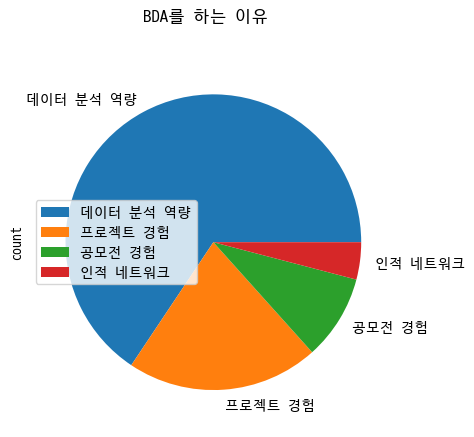

In [33]:
bda_reason = pd.DataFrame(df_point['bda하는이유'].value_counts())
bda_reason = bda_reason[bda_reason['count']> 10]
bda_reason.plot(kind='pie', subplots=True, title='BDA를 하는 이유')

## 1-7 유입경로

- df_point 와 df_satisfy에만 있음

In [34]:
df_point['유입경로'].value_counts()

유입경로
에브리타임                                            835
기존 BDA 오픈채팅방                                     147
인스타그램                                            142
링커리어                                              40
지인 추천                                             40
교내 플랫폼 (에브리타임 x)                                   6
캠퍼즈                                                3
검색                                                 2
잡페스티벌                                              2
친구권유                                               1
인터넷 서치                                             1
이전 기수 활동                                           1
데이터 학회 검색                                          1
소개                                                 1
인터넷 서칭                                             1
네이버 검색 (블로그)                                       1
지인추천 ( 기존 회원x)                                     1
네이버카페                                              1
구글 검색                                    

In [35]:
inflow_dict = {
    '에브리타임': '교내 플랫폼',
    '기존 BDA 오픈채팅방': '기존 BDA 관련',
    '이전 기수 활동': '기존 BDA 관련',
    'Bda 오픈채팅방/회비입금내역에서 제가 쓰는 뱅킹앱은 입금자명이 보이지 않습니다.': '기존 BDA 관련',
    '인스타그램': '소셜 미디어',
    '링커리어': '소셜 미디어',
    '캠퍼즈': '소셜 미디어',
    '캠퍼스픽': '소셜 미디어',
    '지인 추천': '지인 추천',
    '친구권유': '지인 추천',
    '지인추천 ( 기존 회원x)': '지인 추천',
    '지인 추천(참여한적 없는)': '지인 추천',
    '인턴 동료 추천': '지인 추천',
    '검색': '검색/인터넷',
    '인터넷 서치': '검색/인터넷',
    '데이터 학회 검색': '검색/인터넷',
    '인터넷 서칭': '검색/인터넷',
    '네이버 검색 (블로그)': '검색/인터넷',
    '네이버카페': '검색/인터넷',
    '구글 검색': '검색/인터넷',
    '블로그': '검색/인터넷',
    '인터넷 검색': '검색/인터넷',
    '스펙업 카페': '검색/인터넷',
    '교내학회': '검색/인터넷',
    '잡페스티벌': '기타',
    '소개': '기타',
    '교내 플랫폼 (에브리타임 x)': '교내 플랫폼'
}

In [36]:
df_point['유입경로'] = df_point['유입경로'].replace(inflow_dict)
df_point['유입경로'].value_counts()

유입경로
교내 플랫폼       841
소셜 미디어       186
기존 BDA 관련    149
지인 추천         44
검색/인터넷        12
기타             3
Name: count, dtype: int64

In [37]:
df_satisfy['유입경로'].value_counts()

유입경로
에브리타임                                            838
기존 BDA 오픈채팅방                                     147
인스타그램                                            142
링커리어                                              40
지인 추천                                             40
교내 플랫폼 (에브리타임 x)                                   6
캠퍼즈                                                3
검색                                                 2
잡페스티벌                                              2
친구권유                                               1
인터넷 서치                                             1
이전 기수 활동                                           1
데이터 학회 검색                                          1
소개                                                 1
인터넷 서칭                                             1
네이버 검색 (블로그)                                       1
지인추천 ( 기존 회원x)                                     1
네이버카페                                              1
구글 검색                                    

In [38]:
df_satisfy['유입경로'] = df_satisfy['유입경로'].replace(inflow_dict)
df_satisfy['유입경로'].value_counts()

유입경로
교내 플랫폼       844
소셜 미디어       186
기존 BDA 관련    149
지인 추천         44
검색/인터넷        12
기타             3
Name: count, dtype: int64

## 1-8 학점
- df_point에만 있음

In [39]:
df_point['학점'].value_counts()

학점
18                   424
0                    177
15                    81
21                    76
19                    69
20                    58
17                    51
12                    44
14                    22
16                    21
18학점                  21
9                     17
22                    14
15학점                   9
10                     8
6                      7
13                     6
3                      5
12학점                   5
18.5                   5
20학점                   5
19학점                   5
21학점                   5
19.5                   4
11                     4
17학점                   4
24                     3
16학점                   3
23                     3
O                      2
13학점                   2
5                      2
12(교환학생)               2
11학점                   1
14학점                   1
18 (확정안됨)              1
3학점                    1
11~13학점                1
22학점                   1
대학원생 9학               

In [40]:
# 학점도 앞에 나온 숫자만 뽑아서 전처리
df_point['학점'] = df_point['학점'].apply(lambda x: str(x)).apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)
df_point['학점'].value_counts()

학점
18    453
0     229
15     90
21     82
19     79
20     65
17     57
12     51
16     24
14     23
9      18
22     15
13      9
10      8
6       7
3       6
11      6
5       3
24      3
23      3
25      1
38      1
4       1
7       1
32      1
Name: count, dtype: int64

## 1-9 참여 경험

In [41]:
df_point['참여경험'].value_counts()

참여경험
스터디                      114
동아리                       43
스터디, 동아리                  37
학회 (BDA 제외)               20
스터디, 학회 (BDA 제외)          15
스터디, 동아리, 학회 (BDA 제외)     10
동아리, 학회 (BDA 제외)           4
Name: count, dtype: int64

In [42]:
df_point['참여경험'] = df_point['참여경험'].fillna('없음')
df_point['참여경험'] = df_point['참여경험'].apply(lambda x: '있음' if x != '없음' else x)
df_point['참여경험'].value_counts()

참여경험
없음    993
있음    243
Name: count, dtype: int64

## 1-10. 프로젝트 경험

In [43]:
df_point['프로젝트경험'].value_counts()

프로젝트경험
없음    1024
있음     211
Name: count, dtype: int64

In [44]:
df_point['프로젝트경험'] = df_point['프로젝트경험'].apply(lambda x : 1 if x == '있음' else 0)

In [45]:
df_point['프로젝트경험'].value_counts()

프로젝트경험
0    1025
1     211
Name: count, dtype: int64

## 1-11. 직무경험

In [46]:
df_point['직무경험'].value_counts()

직무경험
없음    1197
있음      38
Name: count, dtype: int64

In [47]:
df_point['직무경험'] = df_point['직무경험'].apply(lambda x : 1 if x == '있음' else 0)

In [48]:
df_point['직무경험'].value_counts()

직무경험
0    1198
1      38
Name: count, dtype: int64

## 1-12. 뉴스레터 구독여부

In [49]:
df_point['뉴스레터구독여부'].value_counts()

뉴스레터구독여부
아니요    928
예      307
Name: count, dtype: int64

In [50]:
df_point['뉴스레터구독여부'] = df_point['뉴스레터구독여부'].apply(lambda x : 1 if x == '있음' else 0)

In [51]:
df_point['뉴스레터구독여부'].value_counts()

뉴스레터구독여부
0    1236
Name: count, dtype: int64

## 1-13. 팔로우 여부

In [52]:
df_point['팔로우여부'].value_counts()

팔로우여부
예      864
아니요    371
Name: count, dtype: int64

In [53]:
df_point['팔로우여부'] = df_point['팔로우여부'].apply(lambda x : 1 if x == '예' else 0)

In [54]:
df_point['팔로우여부'].value_counts()

팔로우여부
1    864
0    372
Name: count, dtype: int64

## 1-14. 조별활동 참여 희망

In [55]:
df_point['조별활동참여희망'].value_counts()

조별활동참여희망
네. 오프라인으로 참여하고 싶어요          658
네. 온라인으로 참여하고 싶어요           404
아니요. 개인적으로 학회 활동을 하고 싶어요    173
Name: count, dtype: int64

In [56]:
df_point['조별활동참여희망'] = df_point['조별활동참여희망'].fillna('아니요').apply(lambda x : x if x.startswith('네') else '아니요').apply(lambda x : '온라인' if '온라인' in x else x).apply(lambda x: '오프라인' if '오프라인' in x else x)
df_point['조별활동참여희망'].value_counts()

조별활동참여희망
오프라인    658
온라인     404
아니요     174
Name: count, dtype: int64

## 1-15. 데이터 역량 필요

In [57]:
df_point['데이터역량필요'].value_counts()

데이터역량필요
매우 그렇다       693
그렇다          458
보통이다          76
그렇지 않다         7
매우 그렇지 않다      1
Name: count, dtype: int64

# 2. 만족도 파악

- 상벌점이 -20 이상, 지인추천정도 7 이상, 재참여는 만족으로 간주
- 추천정도는 nan값이 너무 많으므로 대답안함으로 -1로 고려

## 2-1. 상벌점

<Axes: >

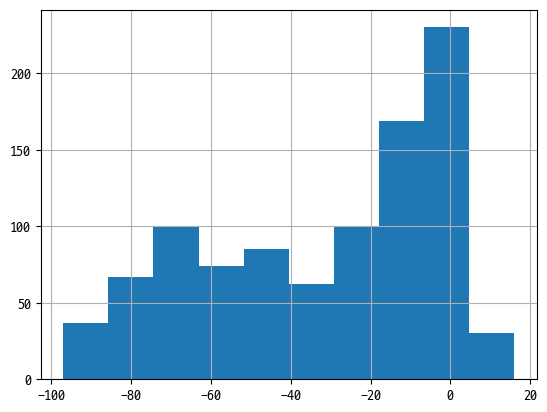

In [58]:
df_point['상벌점'].hist()

## 2-2. 7기 참여여부

In [59]:
df_re['7기참여여부'].value_counts()

7기참여여부
0    1102
1     132
Name: count, dtype: int64

## 2-3. 이전 참여여부

In [60]:
df_satisfy['이전참여여부'].value_counts()

이전참여여부
아니요    1038
예       200
Name: count, dtype: int64

## 2-4 지인추천정도

In [61]:
df_re['bda추천정도'].value_counts(), df_satisfy['bda추천정도'].value_counts()

(bda추천정도
 8.0     47
 7.0     31
 10.0    25
 6.0     22
 9.0     20
 5.0     11
 3.0      5
 4.0      4
 0.0      1
 2.0      1
 Name: count, dtype: int64,
 bda추천정도
 8.0     47
 7.0     31
 10.0    25
 6.0     22
 9.0     20
 5.0     11
 3.0      5
 4.0      4
 0.0      1
 2.0      1
 Name: count, dtype: int64)

In [62]:
df_re['bda추천정도'] = df_re['bda추천정도'].fillna(-1)
df_re['bda추천정도'].value_counts()

bda추천정도
-1.0     1067
 8.0       47
 7.0       31
 10.0      25
 6.0       22
 9.0       20
 5.0       11
 3.0        5
 4.0        4
 0.0        1
 2.0        1
Name: count, dtype: int64

In [63]:
df_satisfy['bda추천정도'] = df_satisfy['bda추천정도'].fillna(-1)
df_satisfy['bda추천정도'].value_counts()

bda추천정도
-1.0     1071
 8.0       47
 7.0       31
 10.0      25
 6.0       22
 9.0       20
 5.0       11
 3.0        5
 4.0        4
 0.0        1
 2.0        1
Name: count, dtype: int64

## 2-5. 만족 컬럼 생성

In [64]:
df_point['만족'] =  df_point['상벌점'].apply(lambda x: 1 if x >= -20 else 0)
df_point['만족'].value_counts()

만족
0    778
1    458
Name: count, dtype: int64

In [65]:
df_re['만족'] = df_re.apply(lambda row: 1 if row['7기참여여부'] == 1 or row['bda추천정도']>=7 else 0, axis = 1)
df_re['만족'].value_counts()

만족
0    995
1    239
Name: count, dtype: int64

In [66]:
df_satisfy['만족'] = df_satisfy.apply(lambda row: 1 if row['이전참여여부'] == 1 or row['bda추천정도']>=7 else 0, axis = 1)
df_satisfy['만족'].value_counts()

만족
0    1115
1     123
Name: count, dtype: int64

# 3. 만족 인원의 개인 특성 파악

## 3-1. 카이제곱으로 영향도 분석

- 유의확률을 0.05로 봤을 때
1. df_point : [희망직무]
2. df_re : [스터디 경험, 직무 경험]
3. df_satisfy : [졸업후 진로, 유입경로]

- 유의확률을 0.1로 봤을 때
1. df_point : [최종학력, 희망직무]
2. df_re : [스터디 경험, 직무 경험]
3. df_satisfy : [최종학력, 졸업후 진로, 유입경로, 데이터역량필요]

In [96]:
df_point_get = df_point.drop(columns=['상벌점','직업내용','뉴스레터구독이름'])
df_re_get = df_re.drop(columns = ['7기참여여부','bda추천정도','최종학과','복수전공','뉴스레터구독이름'])
df_satisfy_get = df_satisfy.drop(columns=['이전참여여부','bda추천정도','3기분반', '4기분반', '5기분반', '6기분반', '7기분반', '8기분반번호_1',
       '8기분반번호_2_', '8기분반번호_3','최종학과','복수전공','추천인정보'])

In [68]:
point_cols = df_point_get.columns.to_list()

In [69]:
for i in range(len(point_cols)-1):
    crosstab = pd.crosstab(df_point_get.iloc[:,i], df_point['만족'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    if p < 0.1:
        print(f"변수: {point_cols[i]}, Chi2: {chi2:.3f}, p-value: {p:.3f}")

변수: 최종학력, Chi2: 11.612, p-value: 0.071
변수: 희망직무, Chi2: 30.731, p-value: 0.043


In [70]:
re_cols = df_re_get.columns.to_list()

In [71]:
for i in range(len(re_cols)-1):
    crosstab = pd.crosstab(df_re_get.iloc[:,i], df_re['만족'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    if p < 0.1:
        print(f"변수: {re_cols[i]}, Chi2: {chi2:.3f}, p-value: {p:.3f}")

변수:  스터디경험, Chi2: 5.924, p-value: 0.015
변수: 직무경험, Chi2: 5.970, p-value: 0.015


In [72]:
satisfy_cols = df_satisfy_get.columns.to_list()

In [73]:
for i in range(len(satisfy_cols)-1):
    crosstab = pd.crosstab(df_satisfy_get.iloc[:,i], df_satisfy['만족'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    if p < 0.1:
        print(f"변수: {satisfy_cols[i]}, Chi2: {chi2:.3f}, p-value: {p:.3f}")

변수: 최종학력, Chi2: 11.256, p-value: 0.081
변수: 졸업후진로, Chi2: 50.843, p-value: 0.014
변수: 유입경로, Chi2: 11.500, p-value: 0.042
변수: 데이터역량필요, Chi2: 9.147, p-value: 0.058


## 3-2. 유의미한 차이 시각화

In [74]:
from matplotlib import font_manager, rc

font_path = "C:/Users/귀여운 은순/AppData/Local/Microsoft/Windows/Fonts/D2Coding-Ver1.3.2-20180524.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [75]:
print (plt.rcParams['font.family'] )

['D2Coding']


In [76]:
## 전체 이탈율
print(df_point['상벌점'][df_point['상벌점']>=-20].count()/ df_point['상벌점'].count())
print(df_point[df_point['상벌점']>=-20][df_point['최종학력'] == 'IT'][df_point['희망직무'] == 'DA']['상벌점'].count()/df_point[df_point['최종학력'] == 'IT'][df_point['희망직무'] == 'DA']['상벌점'].count())
print(df_point[df_point['상벌점']>=-20][df_point['최종학력'] == '문과'][df_point['희망직무'] == 'DA']['상벌점'].count()/df_point[df_point['최종학력'] == '문과'][df_point['희망직무'] == 'DA']['상벌점'].count())

0.480083857442348
0.39215686274509803
0.5217391304347826


C:\Users\귀여운 은순\AppData\Local\Temp\ipykernel_18916\3010445869.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df_point[df_point['상벌점']>=-20][df_point['최종학력'] == 'IT'][df_point['희망직무'] == 'DA']['상벌점'].count()/df_point[df_point['최종학력'] == 'IT'][df_point['희망직무'] == 'DA']['상벌점'].count())
C:\Users\귀여운 은순\AppData\Local\Temp\ipykernel_18916\3010445869.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df_point[df_point['상벌점']>=-20][df_point['최종학력'] == 'IT'][df_point['희망직무'] == 'DA']['상벌점'].count()/df_point[df_point['최종학력'] == 'IT'][df_point['희망직무'] == 'DA']['상벌점'].count())
C:\Users\귀여운 은순\AppData\Local\Temp\ipykernel_18916\3010445869.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df_point[df_point['상벌점']>=-20][df_point['최종학력'] == 'IT'][df_point['희망직무'] == 'DA']['상벌점'].count()/df_point[df_point['최종학력'] == 'IT'][df_point['희망직무'] == 'DA']['상벌점'].count())
C:\Users\귀여운 은순\App

In [77]:
relation_point = df_point_get.dropna()

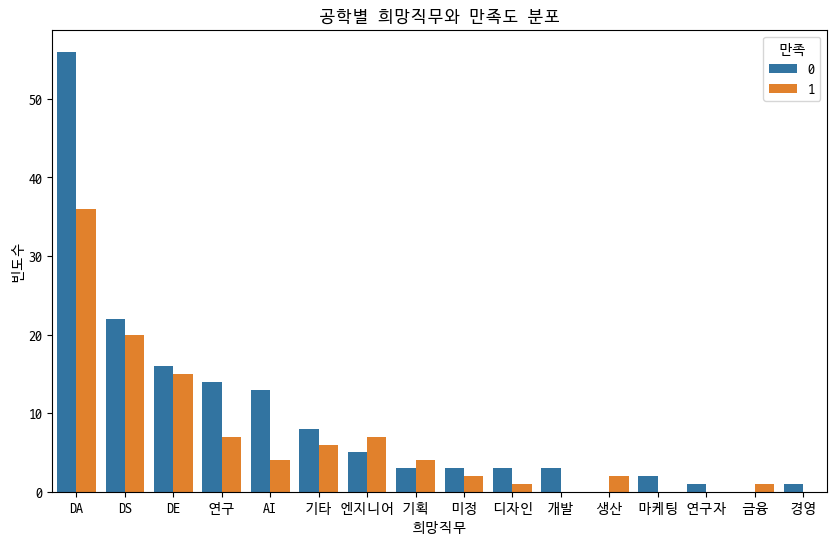

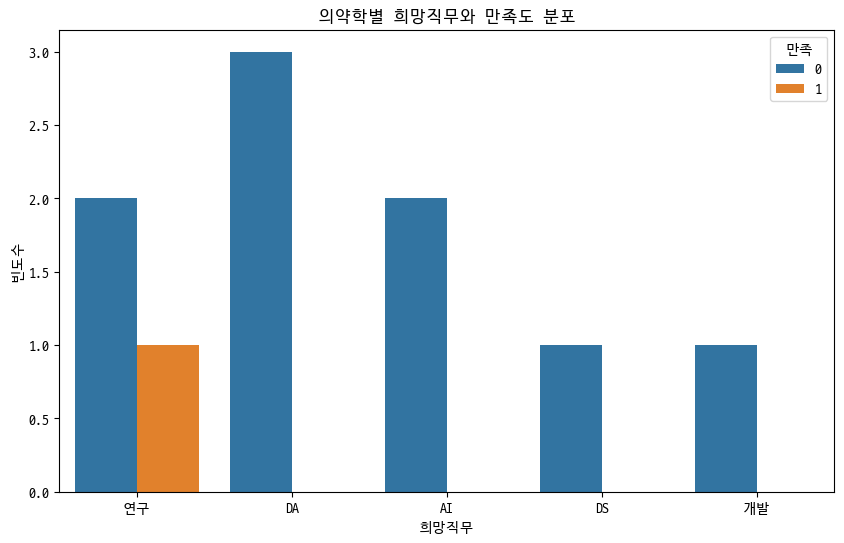

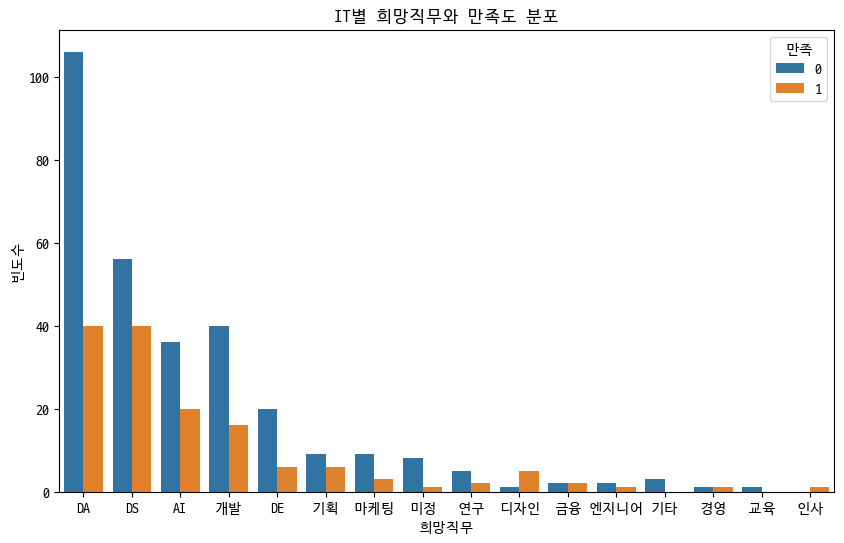

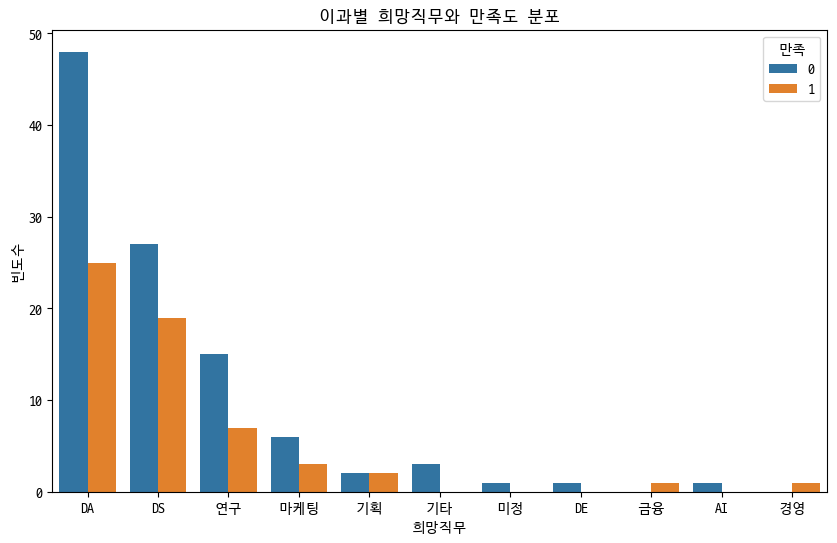

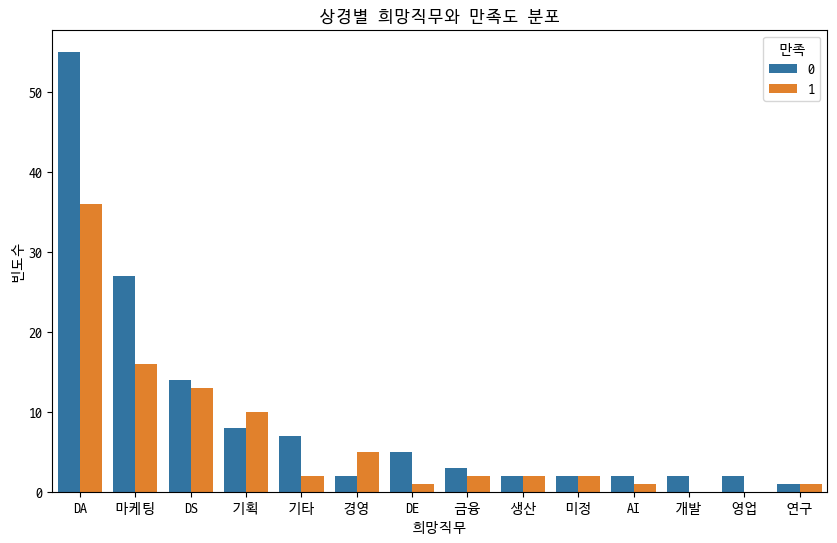

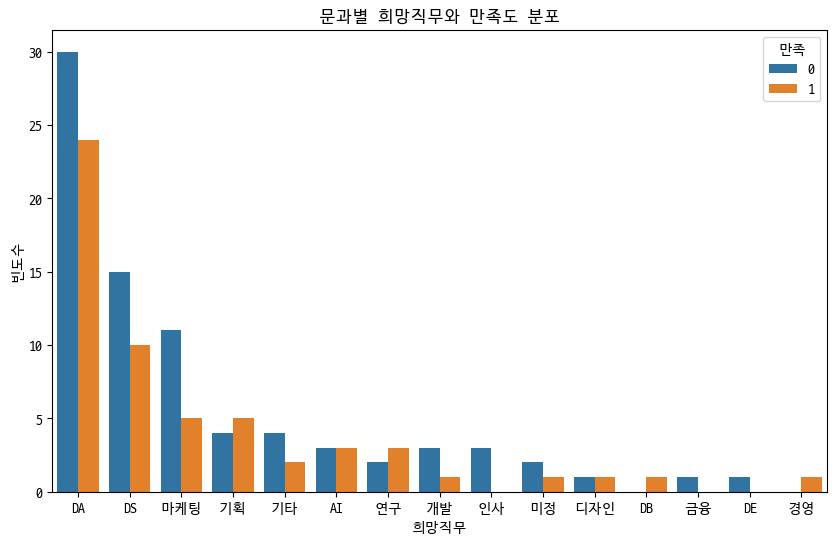

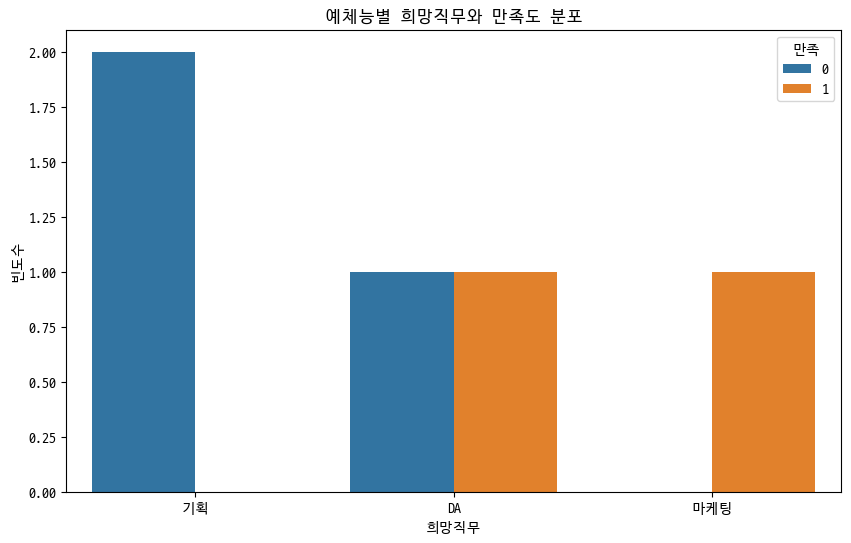

In [78]:
for 학력 in relation_point['최종학력'].unique():
    plt.figure(figsize=(10, 6))  # 플롯 크기 설정
    subset = relation_point[relation_point['최종학력'] == 학력]
    
    # 희망직무별 빈도수 계산 및 정렬
    job_counts = subset['희망직무'].value_counts().index
    
    # countplot 생성
    sns.countplot(data=subset, x='희망직무', hue='만족', order=job_counts)
    
    # 제목 및 레이블 설정
    plt.title(f'{학력}별 희망직무와 만족도 분포')
    plt.xlabel('희망직무')
    plt.ylabel('빈도수')
    
    # 그래프 표시
    plt.show()

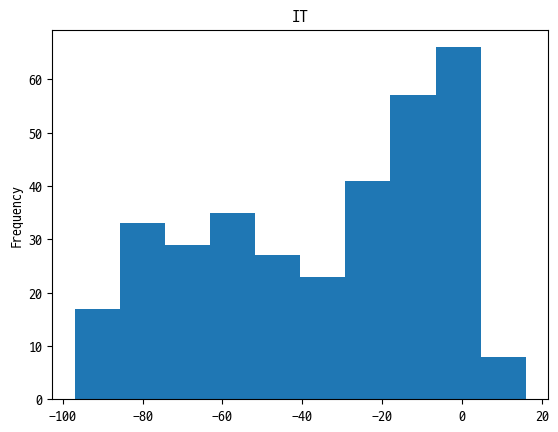

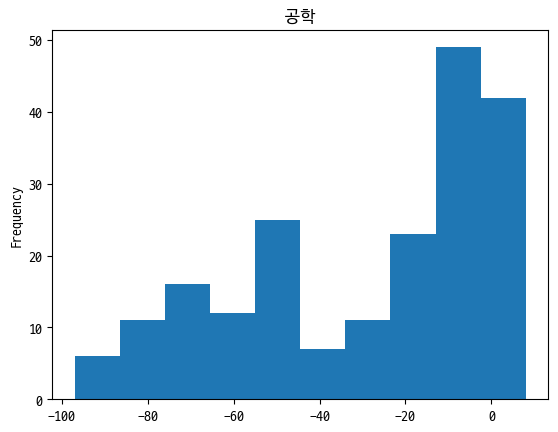

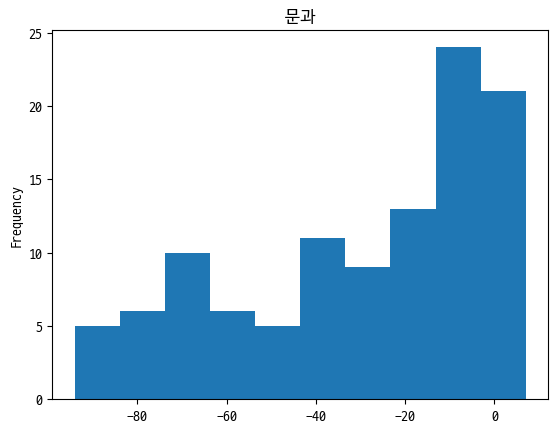

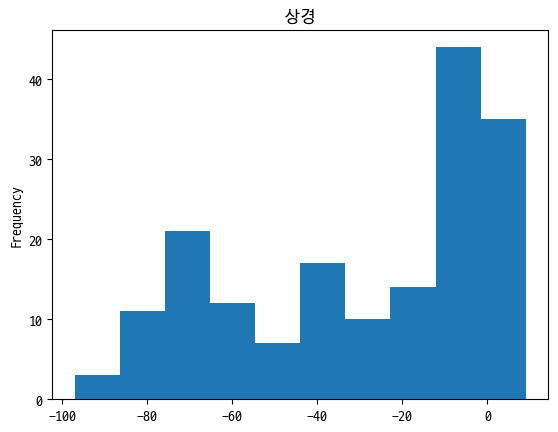

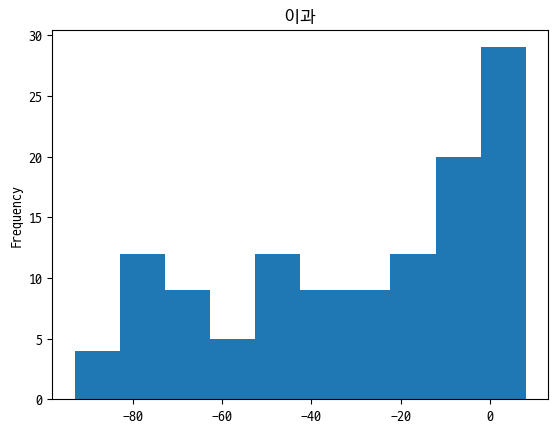

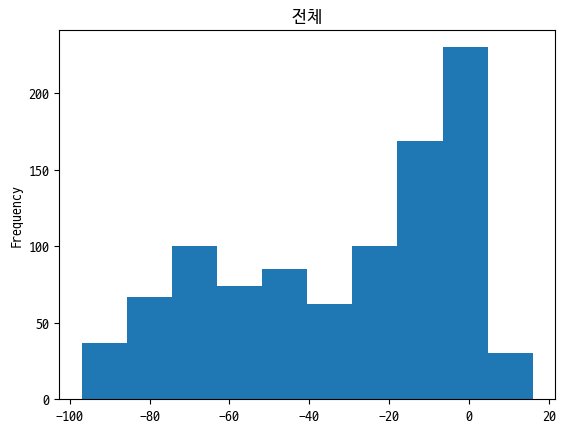

In [79]:
major_lst = ['IT', '공학', '문과', '상경', '이과']

for major in major_lst:
    df_point[df_point['최종학력'] == major]['상벌점'].plot(title=major,kind='hist')
    plt.show()
df_point['상벌점'].plot(kind='hist',title='전체')
plt.show()

<Axes: xlabel='최종학력', ylabel='count'>

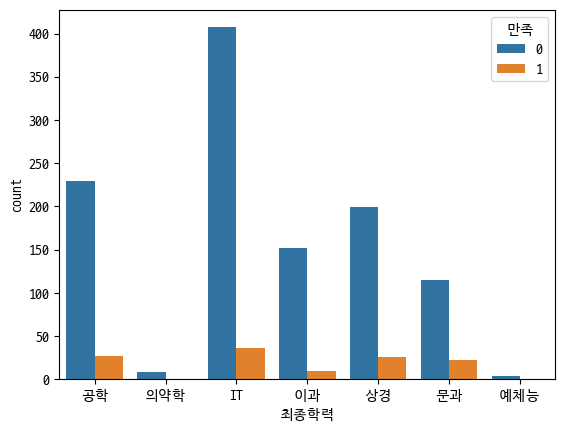

In [80]:
sns.countplot(data=df_satisfy_get, x='최종학력',hue='만족')

## 3-3. 의사결정나무

In [171]:
df_point_encode = pd.get_dummies(df_point_get.drop(columns='만족'))

In [172]:
df_encdoe_cols = df_point_encode.columns.to_list()
df_encdoe_cols

['하루공부시간',
 '팔로우여부',
 '학점',
 '프로젝트경험',
 '직무경험',
 '뉴스레터구독여부',
 '직업_대학교 2학년 이하',
 '직업_대학교 3학년 이상',
 '최종학력_IT',
 '최종학력_공학',
 '최종학력_문과',
 '최종학력_상경',
 '최종학력_예체능',
 '최종학력_의약학',
 '최종학력_이과',
 '교육희망직무_-',
 '교육희망직무_.',
 '교육희망직무_AI',
 '교육희망직무_Ai, 개발, 기획 등 여러 분야에 관심있습니다.',
 '교육희망직무_R&D',
 '교육희망직무_개발',
 '교육희망직무_개발, AI',
 '교육희망직무_개발, 보안',
 '교육희망직무_개발과 AI, 금융, 디지털기획',
 '교육희망직무_경영, 회계, 세무',
 '교육희망직무_경영, 회계, 세무 / 금융, 보험 / AI',
 '교육희망직무_경영/제조',
 '교육희망직무_공공기관',
 '교육희망직무_공정기술,공정설계',
 '교육희망직무_금융, 보험',
 '교육희망직무_금융, 회계, AI',
 '교육희망직무_기획, 전략',
 '교육희망직무_기획, 전략, 개발, AI, 마케팅',
 '교육희망직무_기획,전략 & 영업',
 '교육희망직무_데이터 분석 코칭(스포츠계)',
 '교육희망직무_도시 개발',
 '교육희망직무_디자인',
 '교육희망직무_마케팅, 광고, MD',
 '교육희망직무_모르겠음',
 '교육희망직무_물류, 무역',
 '교육희망직무_바이오',
 '교육희망직무_바이오인포매틱스',
 '교육희망직무_반도체',
 '교육희망직무_반도체,2차 전지',
 '교육희망직무_법무, 사무, 총무',
 '교육희망직무_보건, 의료',
 '교육희망직무_없음',
 '교육희망직무_영업',
 '교육희망직무_이커머스 산업 관련',
 '교육희망직무_인사, HR',
 '교육희망직무_자동차, 반도체',
 '교육희망직무_정보보안',
 '교육희망직무_제조, 생산',
 '교육희망직무_퀀트',
 '교육희망직무_품질/관리',
 '교육희망직무_품질관리 생산관리',
 '희망직무_AI',
 '희망직무_D

In [173]:
train_x, test_x, train_y, test_y = train_test_split(df_point_encode,df_point_get['만족'])

dt = DecisionTreeClassifier()
dt.fit(train_x,train_y)

DecisionTreeClassifier()

In [174]:
dt.score(test_x,test_y)

0.5469255663430421

In [175]:
dt.feature_names_in_

array(['하루공부시간', '팔로우여부', '학점', '프로젝트경험', '직무경험', '뉴스레터구독여부',
       '직업_대학교 2학년 이하', '직업_대학교 3학년 이상', '최종학력_IT', '최종학력_공학', '최종학력_문과',
       '최종학력_상경', '최종학력_예체능', '최종학력_의약학', '최종학력_이과', '교육희망직무_-',
       '교육희망직무_.', '교육희망직무_AI', '교육희망직무_Ai, 개발, 기획 등 여러 분야에 관심있습니다.',
       '교육희망직무_R&D', '교육희망직무_개발', '교육희망직무_개발, AI', '교육희망직무_개발, 보안',
       '교육희망직무_개발과 AI, 금융, 디지털기획', '교육희망직무_경영, 회계, 세무',
       '교육희망직무_경영, 회계, 세무 / 금융, 보험 / AI', '교육희망직무_경영/제조', '교육희망직무_공공기관',
       '교육희망직무_공정기술,공정설계', '교육희망직무_금융, 보험', '교육희망직무_금융, 회계, AI',
       '교육희망직무_기획, 전략', '교육희망직무_기획, 전략, 개발, AI, 마케팅', '교육희망직무_기획,전략 & 영업',
       '교육희망직무_데이터 분석 코칭(스포츠계)', '교육희망직무_도시 개발', '교육희망직무_디자인',
       '교육희망직무_마케팅, 광고, MD', '교육희망직무_모르겠음', '교육희망직무_물류, 무역', '교육희망직무_바이오',
       '교육희망직무_바이오인포매틱스', '교육희망직무_반도체', '교육희망직무_반도체,2차 전지',
       '교육희망직무_법무, 사무, 총무', '교육희망직무_보건, 의료', '교육희망직무_없음', '교육희망직무_영업',
       '교육희망직무_이커머스 산업 관련', '교육희망직무_인사, HR', '교육희망직무_자동차, 반도체',
       '교육희망직무_정보보안', '교육희망직무_제조, 생산', '교육희망직무_퀀트', '교육희망직무

In [176]:
dt.feature_importances_

array([0.05719561, 0.04238471, 0.11503948, 0.02470393, 0.01477538,
       0.        , 0.0189359 , 0.00951636, 0.02607571, 0.01337395,
       0.00553667, 0.02849016, 0.00378892, 0.00309845, 0.01619539,
       0.        , 0.        , 0.01838858, 0.        , 0.        ,
       0.02709868, 0.        , 0.        , 0.        , 0.02260314,
       0.        , 0.        , 0.        , 0.        , 0.02068048,
       0.        , 0.03929393, 0.00180443, 0.        , 0.        ,
       0.        , 0.        , 0.02409921, 0.        , 0.01593213,
       0.00320788, 0.        , 0.        , 0.        , 0.00233908,
       0.        , 0.        , 0.00284099, 0.00233491, 0.00329496,
       0.        , 0.        , 0.00307744, 0.        , 0.        ,
       0.        , 0.00738819, 0.01603382, 0.        , 0.00744003,
       0.00462628, 0.0108178 , 0.00250963, 0.        , 0.00412687,
       0.00704761, 0.00484674, 0.00250198, 0.00751188, 0.00249502,
       0.00389846, 0.0022682 , 0.00959568, 0.        , 0.     

In [190]:
df_point_encode = pd.get_dummies(df_point_get[['최종학력','희망직무']])

In [191]:
train_x, test_x, train_y, test_y = train_test_split(df_point_encode,df_point_get['만족'])

dt = DecisionTreeClassifier()
dt.fit(train_x,train_y)

DecisionTreeClassifier()

In [192]:
dt.score(test_x,test_y)

0.6181229773462783

In [193]:
feature_lst = dt.feature_names_in_.tolist()
feature_lst

['최종학력_IT',
 '최종학력_공학',
 '최종학력_문과',
 '최종학력_상경',
 '최종학력_예체능',
 '최종학력_의약학',
 '최종학력_이과',
 '희망직무_AI',
 '희망직무_DA',
 '희망직무_DB',
 '희망직무_DE',
 '희망직무_DS',
 '희망직무_개발',
 '희망직무_경영',
 '희망직무_교육',
 '희망직무_금융',
 '희망직무_기타',
 '희망직무_기획',
 '희망직무_디자인',
 '희망직무_마케팅',
 '희망직무_미정',
 '희망직무_생산',
 '희망직무_엔지니어',
 '희망직무_연구',
 '희망직무_연구자',
 '희망직무_영업',
 '희망직무_인사']

In [197]:
feature_score_lst = dt.feature_importances_.tolist()

In [199]:
feature_dict = dict()
for i,j in zip(feature_lst, feature_score_lst):
    feature_dict[i] = j
feature_dict

{'최종학력_IT': 0.08497735337274806,
 '최종학력_공학': 0.0438176530506728,
 '최종학력_문과': 0.0202857609278138,
 '최종학력_상경': 0.024779751203757687,
 '최종학력_예체능': 0.06867337869124025,
 '최종학력_의약학': 0.0337871360698655,
 '최종학력_이과': 0.04059576420856861,
 '희망직무_AI': 0.021955239897677694,
 '희망직무_DA': 0.00588210032450188,
 '희망직무_DB': 0.020359474421801343,
 '희망직무_DE': 0.044652493148671285,
 '희망직무_DS': 0.06931380908555239,
 '희망직무_개발': 0.01748361300405899,
 '희망직무_경영': 0.1465582140549573,
 '희망직무_교육': 0.0,
 '희망직무_금융': 0.04801379688723441,
 '희망직무_기타': 0.035834008905997874,
 '희망직무_기획': 0.02124480862394694,
 '희망직무_디자인': 0.09111019585351779,
 '희망직무_마케팅': 0.03524684052958814,
 '희망직무_미정': 0.017554161653728306,
 '희망직무_생산': 0.02102960351908741,
 '희망직무_엔지니어': 0.003480955671635276,
 '희망직무_연구': 0.022470496158112113,
 '희망직무_연구자': 0.009081181004378911,
 '희망직무_영업': 0.007989605940878663,
 '희망직무_인사': 0.043822603790006645}

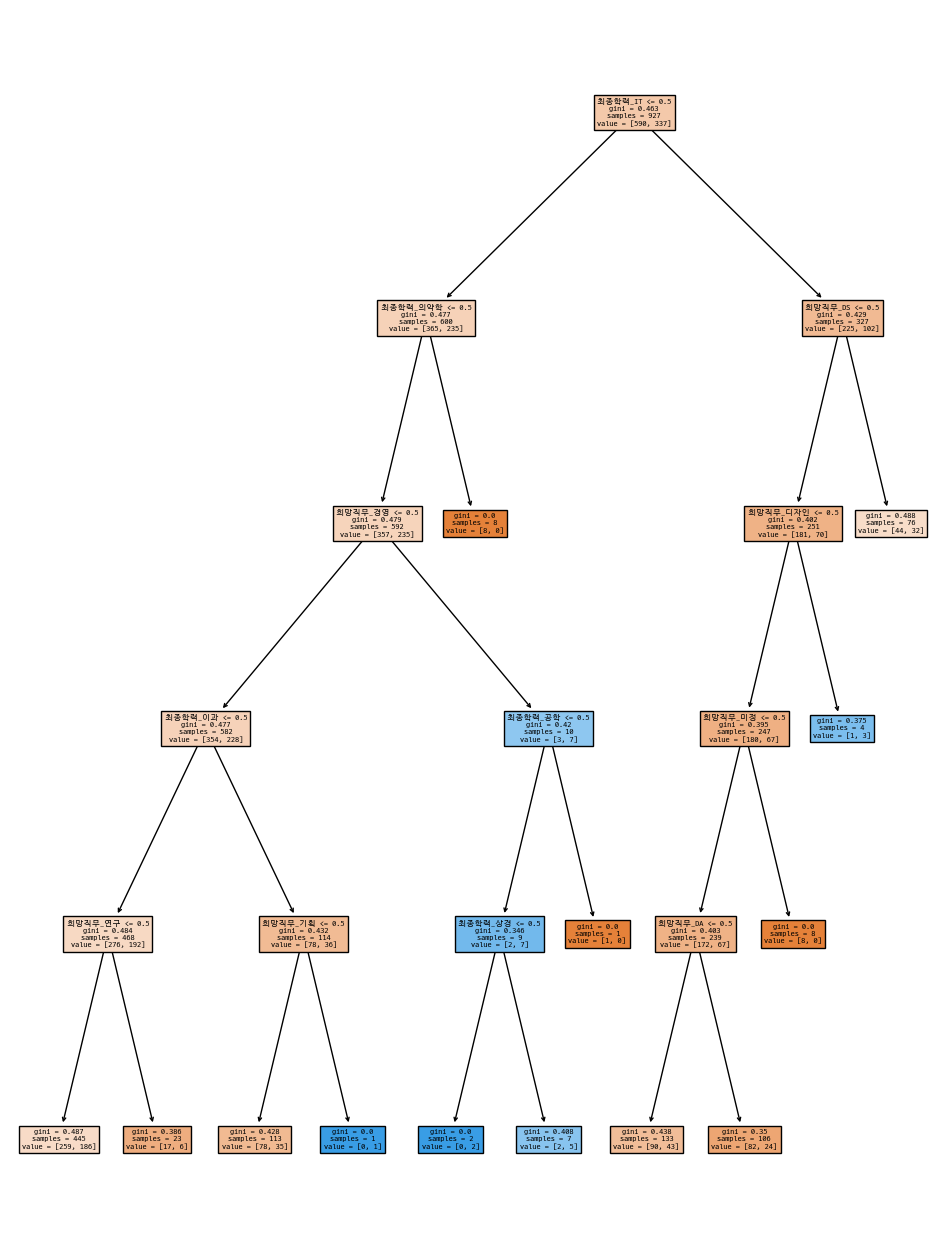

In [189]:
dt = DecisionTreeClassifier(max_depth=5)
plt.figure(figsize=(12,16))
dt.fit(train_x,train_y)
plot_tree(dt, filled=True, feature_names = feature_lst)
plt.show()

In [203]:
df_point[df_point['최종학력'] == '상경']['bda하는이유'].value_counts()

bda하는이유
데이터 분석 역량    158
프로젝트 경험       40
공모전 경험        17
인적 네트워크        8
Name: count, dtype: int64

In [204]:
df_point[df_point['최종학력'] == '문과']['bda하는이유'].value_counts()

bda하는이유
데이터 분석 역량           98
프로젝트 경험             22
공모전 경험              11
인적 네트워크              5
공모전, 프로젝트 경험 둘 다     1
Name: count, dtype: int64

In [202]:
df_point[df_point['최종학력'] == 'IT']['bda하는이유'].value_counts()

bda하는이유
데이터 분석 역량                         242
프로젝트 경험                           135
공모전 경험                             42
인적 네트워크                            20
위 4항목 전부                            1
할수 있는걸 모두 해보고 저에게 맞는것을 찾고 싶습니다      1
자격증 공부                              1
파이썬 실력                              1
Name: count, dtype: int64